<a href="https://colab.research.google.com/github/aditichauhan2k3/Aditi-DataScienceHub/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Cleaning and Preparation:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a DataFrame or equivalent data structure.

In [ ]:
df = pd.read_csv("/content/Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Handle missing values appropriately (e.g., imputation, deletion).

In [ ]:
print("All Datset Column count : "+ str(len(df)))

All Datset Column count : 2126


In [ ]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


Removing the Null Value or Missing Value

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [ ]:
df.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


Detect and treat outliers if necessary.



(2105, 14)


<Axes: title={'center': 'Boxplot for Outlier Detection'}>

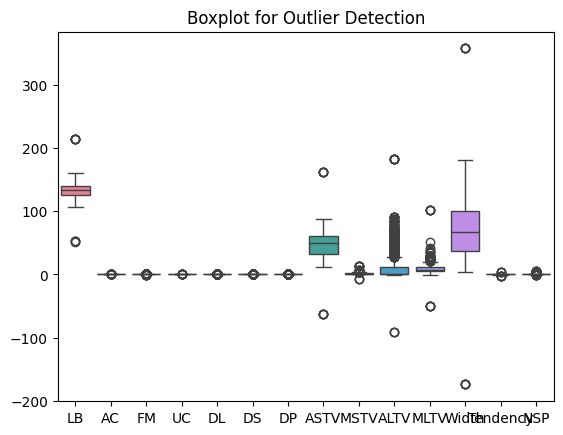

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
plt.title("Boxplot for Outlier Detection")
print(outliers.shape)
sns.boxplot(data = df)

#print(outliers.sum())


(885, 14)


<Axes: title={'center': 'Remove Outliers Boxplot'}>

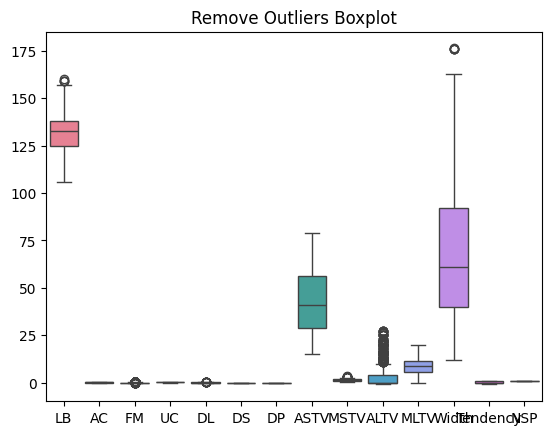

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df_No_outlier = df[~((df < (Q1 - 1.5 * IQR))| ((df > (Q3 + 1.5 * IQR)))).any(axis=1)]
plt.title("Remove Outliers Boxplot")
print(df_No_outlier.shape)
sns.boxplot(data = df_No_outlier)

2. Statistical Summary:

Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [ ]:
# Mean
print("Mean : \n", df.mean(numeric_only=True))

# Median
print("Median: \n", df.median())

# Standard Deviation
print("\n Standard Deviation :\n", df.std(numeric_only=True))

# InterQuatile
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)

IQR = Q3 - Q1

print("\n InterQuatile Rane (IQR): \n", IQR)


# Or, for a quick summary of all statistics:
print("\nFull Statistical Summary:\n", df.describe())

Mean : 
 LB          133.343598
AC            0.003202
FM            0.009963
UC            0.004388
DL            0.001892
DS            0.000003
DP            0.000175
ASTV         46.996929
MSTV          1.361006
ALTV         10.353647
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64
Median: 
 LB          133.000000
AC            0.001631
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

 Standard Deviation :
 LB          11.270154
AC           0.004324
FM           0.067870
UC           0.003350
DL           0.003348
DS           0.000142
DP           0.000840
ASTV        18.847737
MSTV         1.173164
ALTV        21.282102
MLTV         7.772858
Width       42.931822
Tendency     0.6456

Highlight any interesting findings from this summary.

 **Mean and Median:** If the mean and median for a variable are very close, it suggests the data is symmetrically distributed. If they are far apart, the variable may be skewed.
- **Standard Deviation:** Variables with a high standard deviation have more spread out values, indicating greater variability.
- **Interquartile Range (IQR):** A large IQR means the middle 50% of values are widely spread, while a small IQR means they are close together.
- **Outliers:** If the minimum or maximum values are far from the 25th or 75th percentiles, it suggests the presence of outliers.
- **Example:** If any variable has a mean much higher than the median, it may be right-skewed (many low values, few high values). If the standard deviation is close to or larger than the mean, the data is highly variable.
- **Missing Values:** Since missing values were removed, all columns now have complete data.


3. Data Visualization:

Create histograms or boxplots to visualize the distributions of various numerical variables.

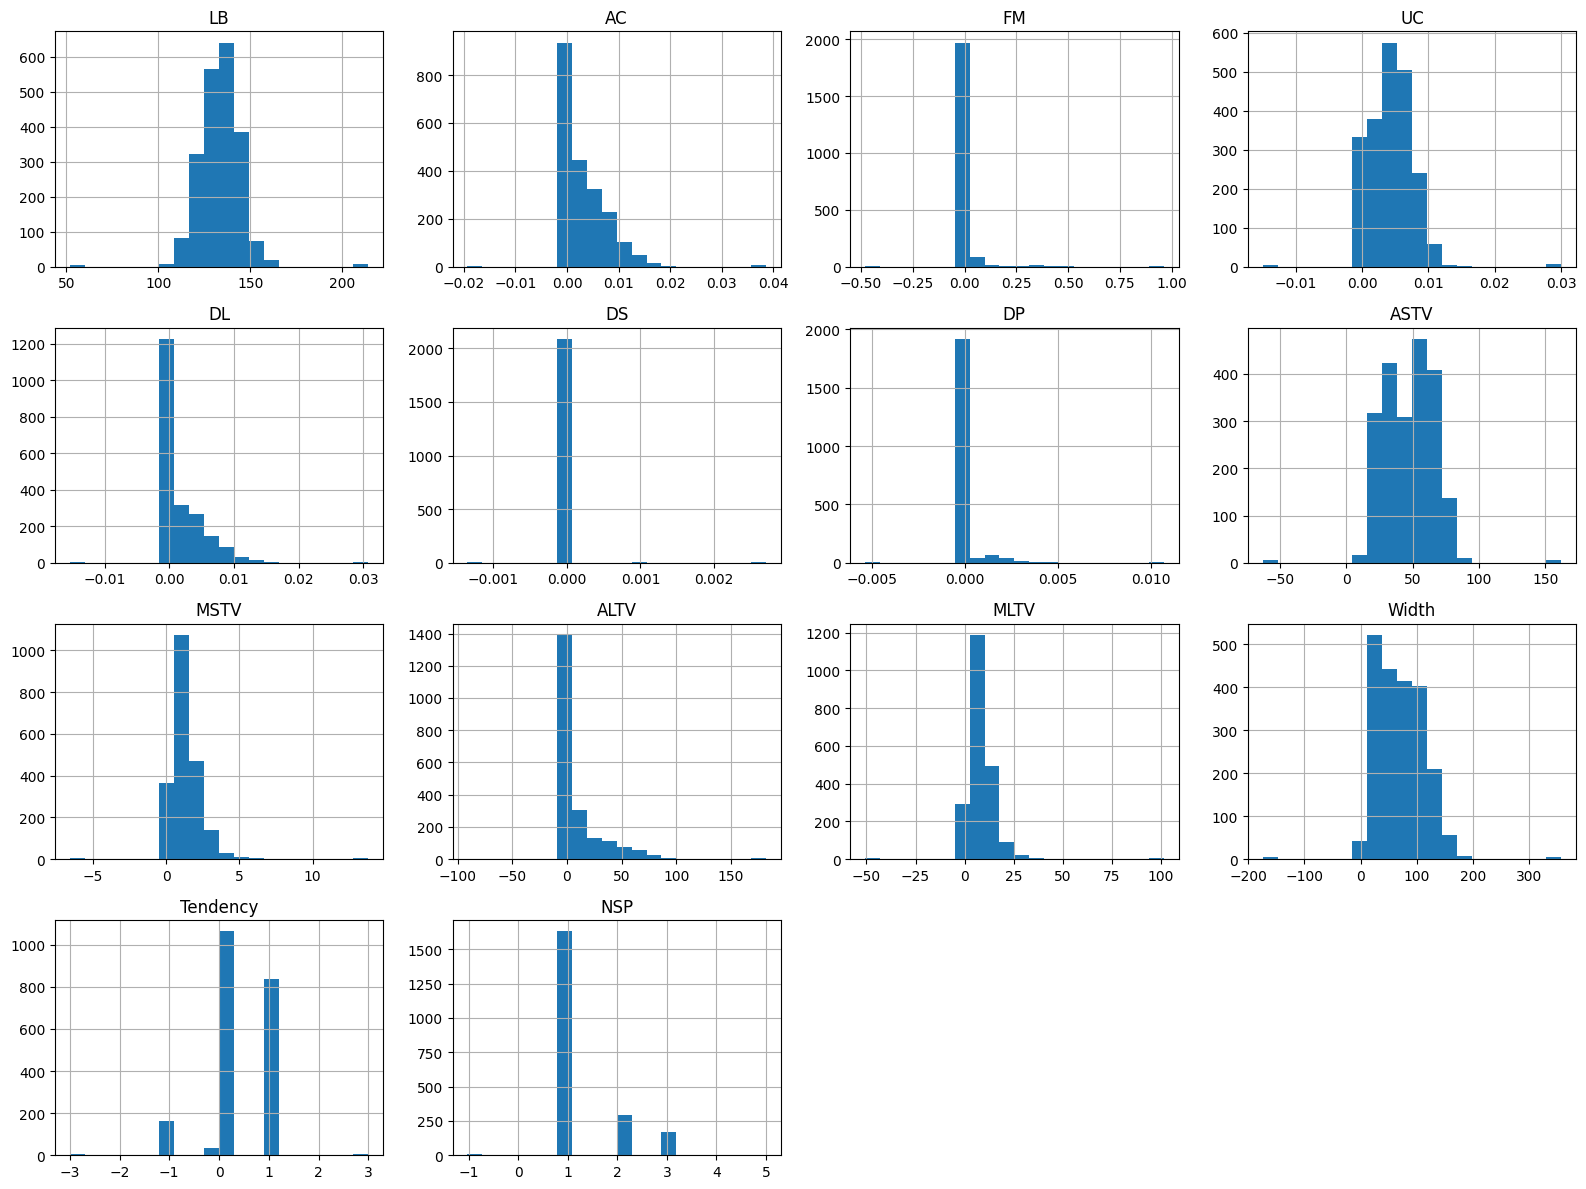

In [ ]:
# Histogram for all numerical
df.hist(figsize=(16,12), bins = 20)
plt.tight_layout()
plt.show()

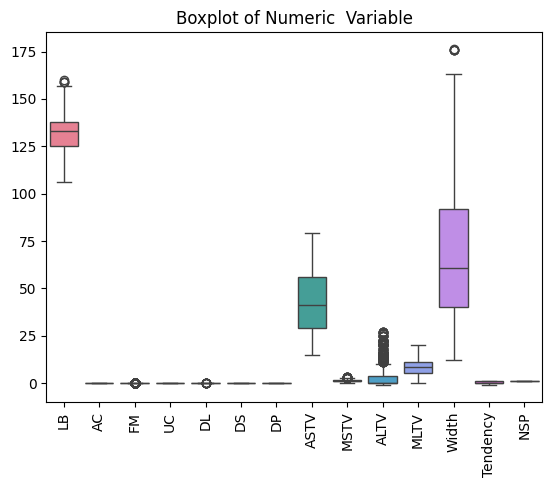

In [ ]:
# Boxplot for all Numeric calls
plt.Figure(figsize=(16,8))
sns.boxplot(data = df_No_outlier)
plt.xticks(rotation = 90)
plt.title("Boxplot of Numeric  Variable")
plt.show()

Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(6,6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

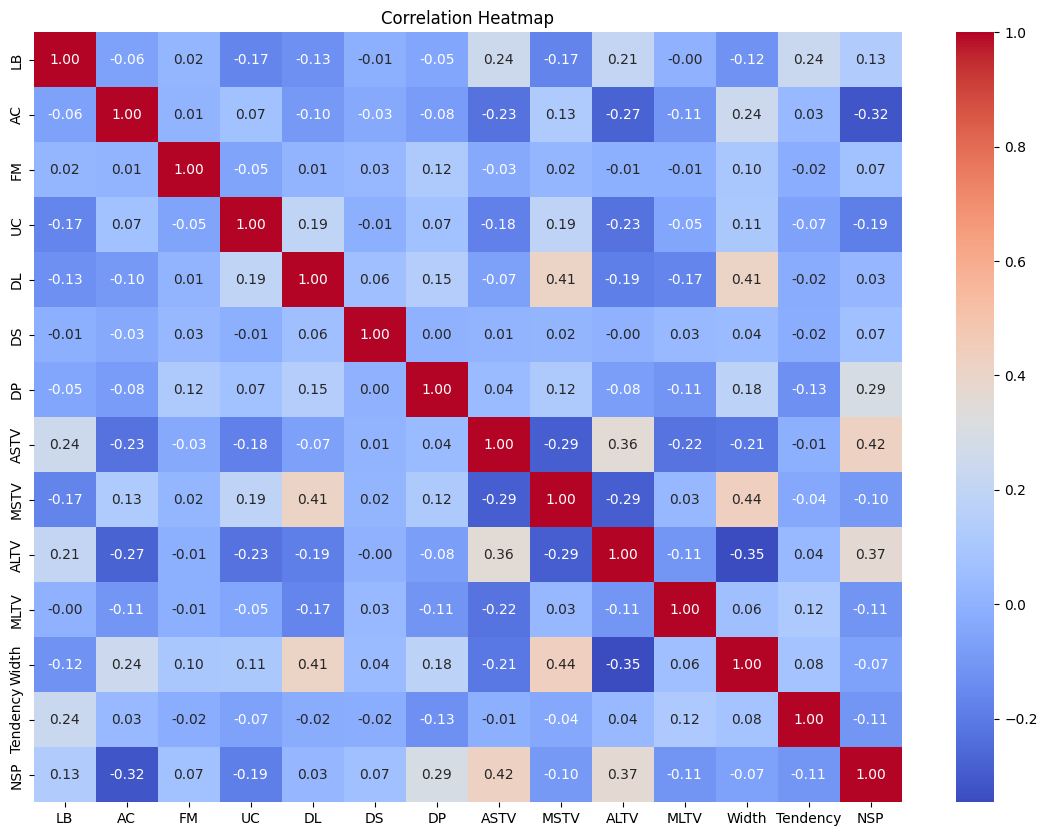

In [ ]:
plt.figure(figsize=(14,10))
corr_metrix = df.corr(numeric_only=True)
sns.heatmap(corr_metrix, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

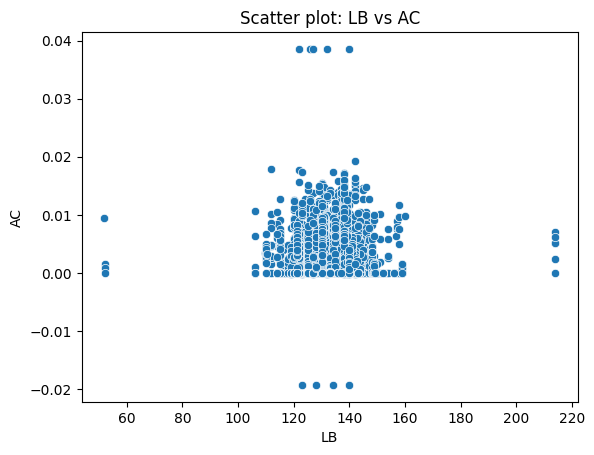

In [ ]:
# scatter plot
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) >= 2:
    plt.Figure(figsize=(8,6))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title(f"Scatter plot: {num_cols[0]} vs {num_cols[1]}")
    plt.show()

Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

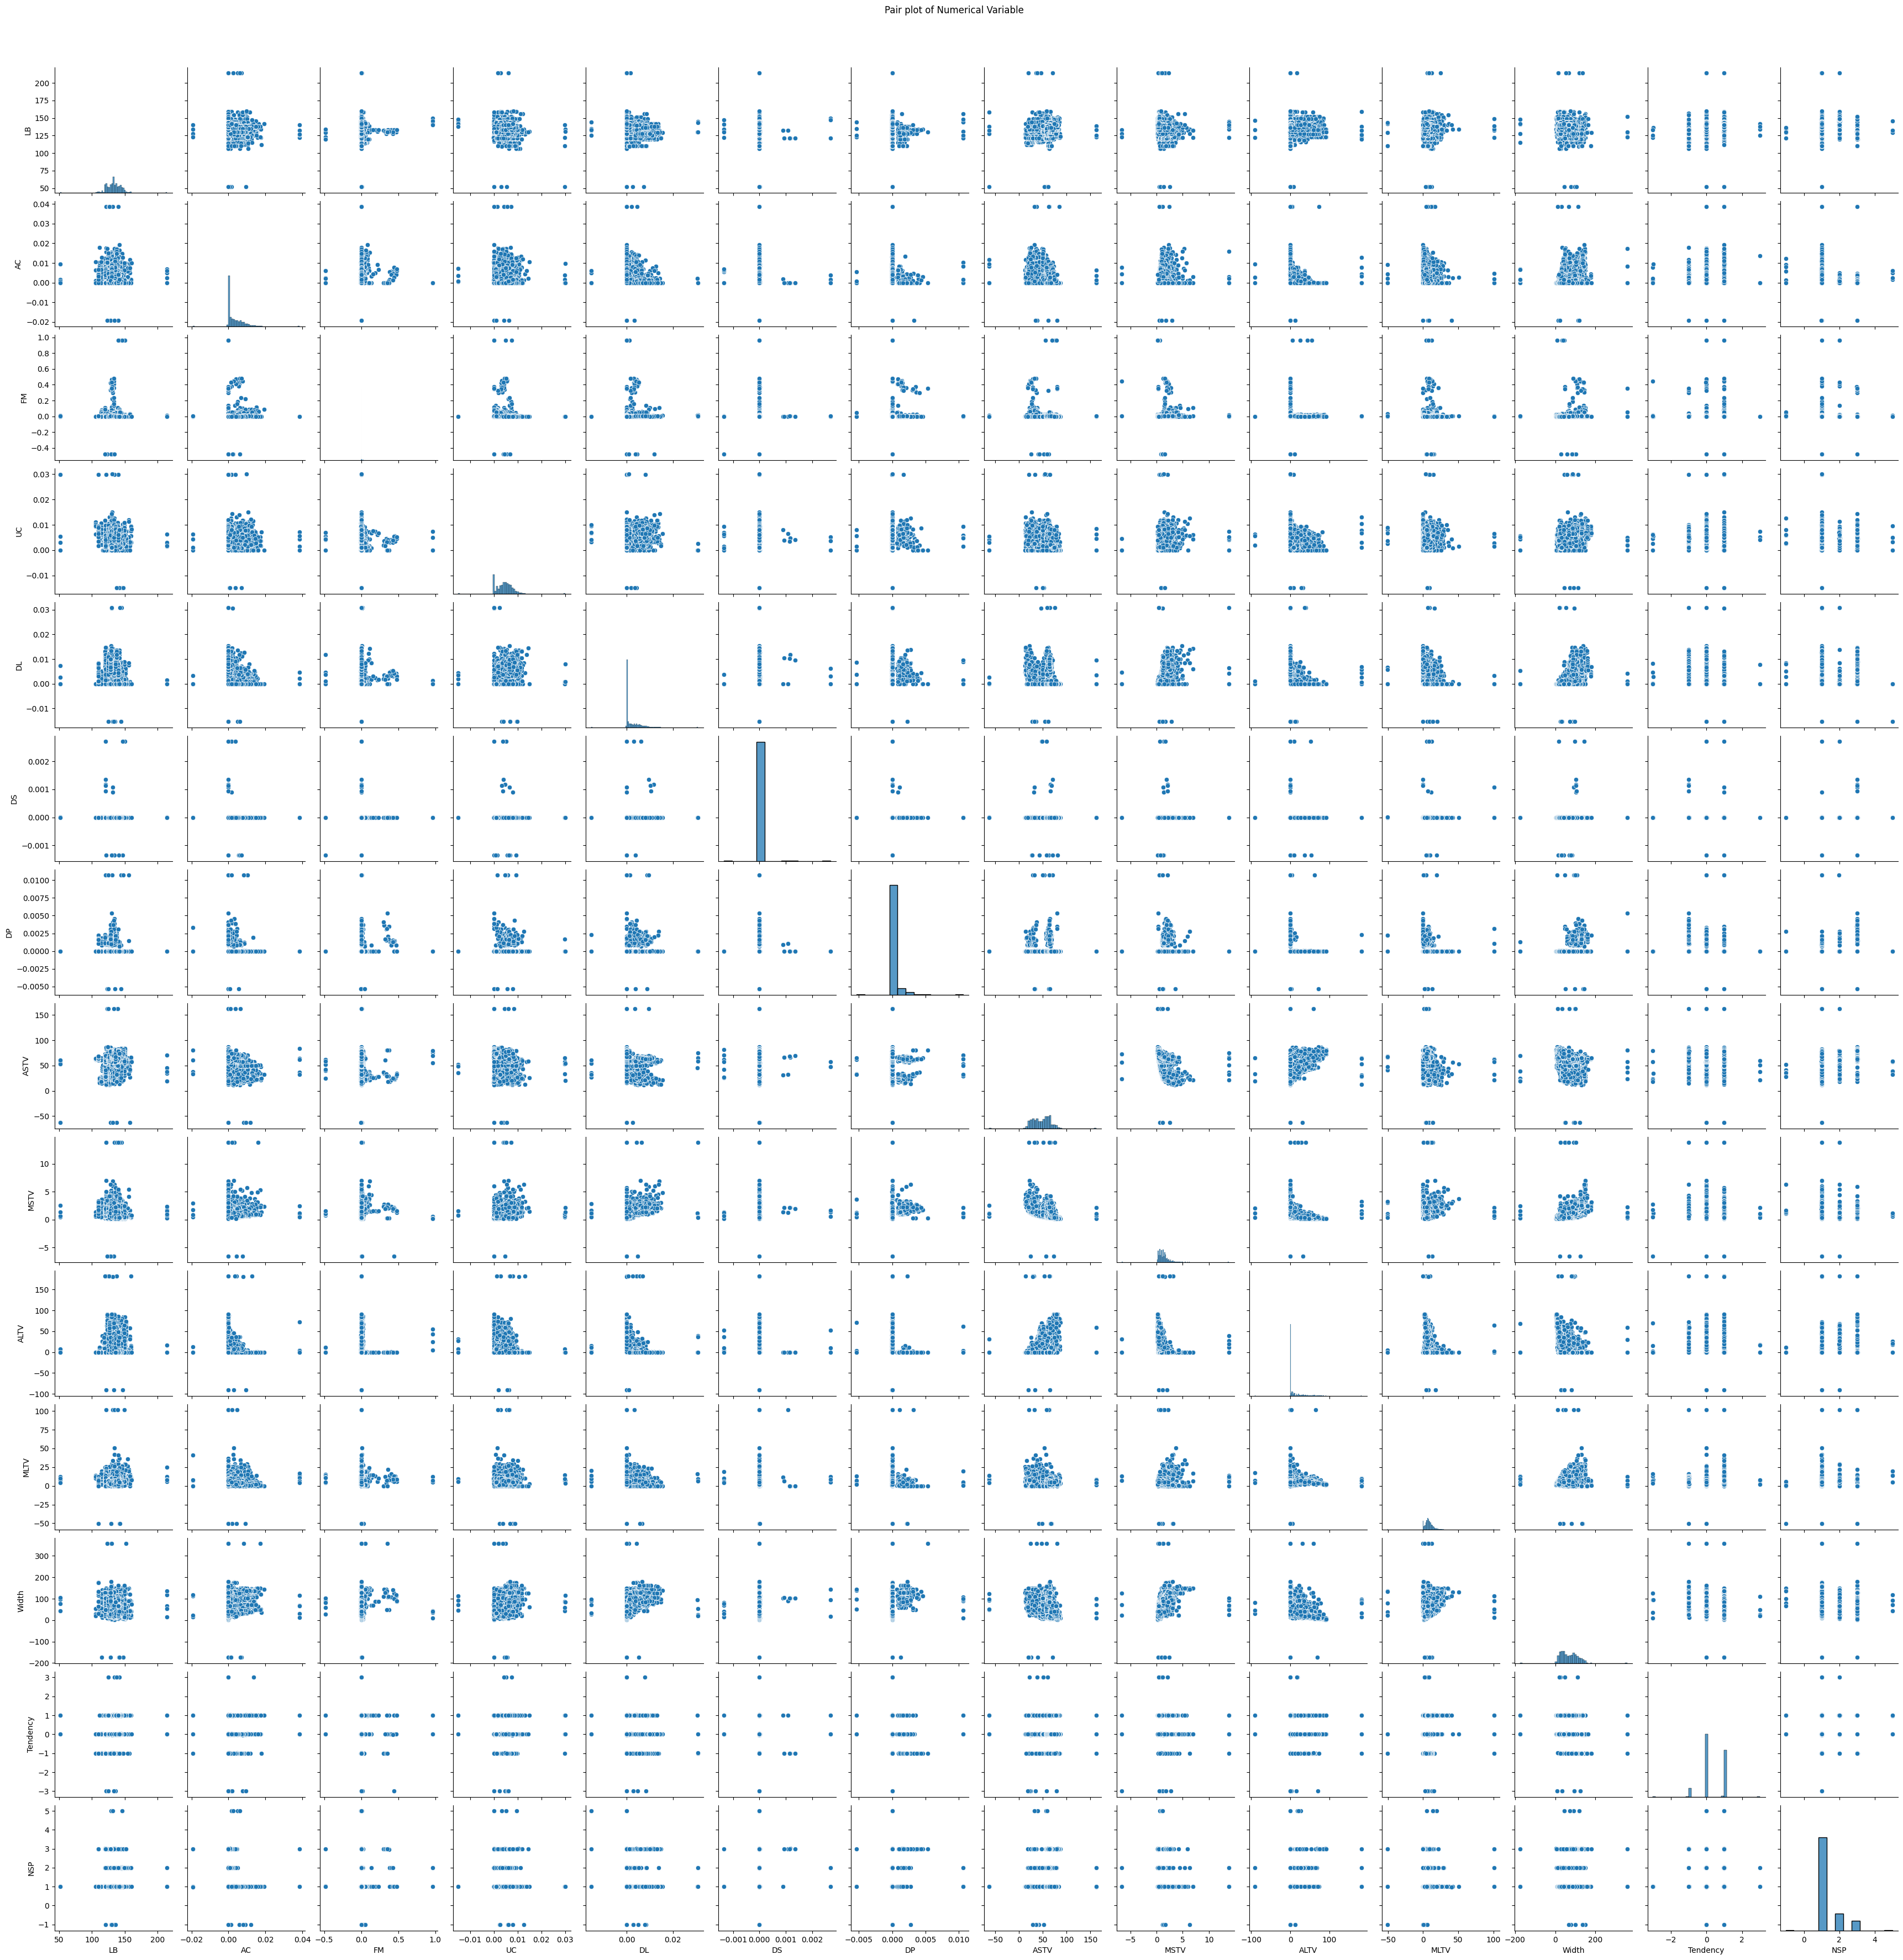

In [ ]:
# Pair plot
sns.pairplot(df, diag_kind='auto')
plt.suptitle("Pair plot of Numerical Variable", y = 1.02)
plt.show()

4. Pattern Recognition and Insights:

identify any correlations between variables and discuss their potential implications.

In [ ]:
corr_pairs = (
    corr_metrix.where(~np.eye(corr_metrix.shape[0], dtype=bool))
    .unstack()
    .dropna()
    .sort_values(key = lambda x: abs(x), ascending=False)
)
print("Top 10 strongest correlations between features:")
print(corr_pairs.head(10))



Top 10 strongest correlations between features:
Width  MSTV     0.435393
MSTV   Width    0.435393
ASTV   NSP      0.422652
NSP    ASTV     0.422652
MSTV   DL       0.410155
DL     MSTV     0.410155
Width  DL       0.410031
DL     Width    0.410031
NSP    ALTV     0.365846
ALTV   NSP      0.365846
dtype: float64


# Conclusion:

Summarize the key insights and patterns discovered through your exploratory analysis.

Answer  :

Remove the outliers in this dataset.

Strong correlations among histogram-based features

Features like histogram mean, median, mode, and variance are highly correlated.

They capture similar information, leading to redundancy.

This suggests the dataset can be simplified without losing much predictive power.

Fetal health label aligns strongly with certain features

Pathological class is most associated with high abnormal variability, fewer accelerations, and more decelerations.

These patterns reinforce what clinicians already look for in CTG interpretation.



Discuss how these findings could impact decision-making or further analyses.

    Answer : -
        
        Clinical decision support

        Automated systems can rely on variability + acceleration/deceleration features to flag high-risk cases.

        Provides objective, consistent interpretation, reducing dependence on subjective clinician judgment.

        Modeling and predictive analytics

        Feature selection/dimensionality reduction is important due to redundancy. Tree-based models or PCA can help.

        The clear separation of temporal features across health classes means these metrics can be used for early warning scores or triaging in obstetric monitoring.

        Future research directions

        Access to raw CTG time series would allow deeper temporal pattern analysis (e.g., trend detection within a recording, sequence modeling using RNNs/transformers).

        Combining CTG with other maternal/fetal data could improve predictive accuracy.